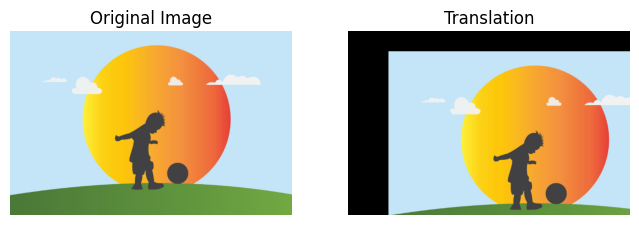

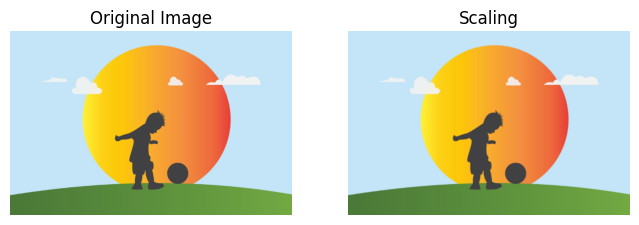

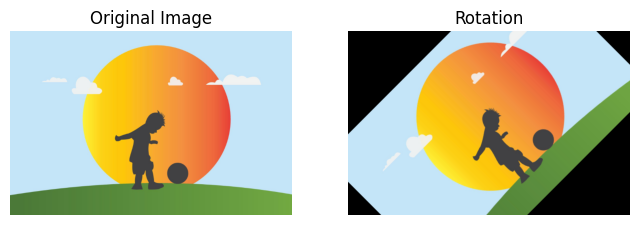

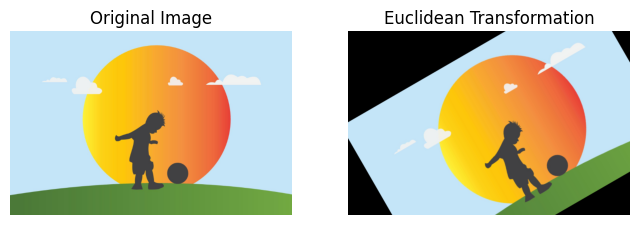

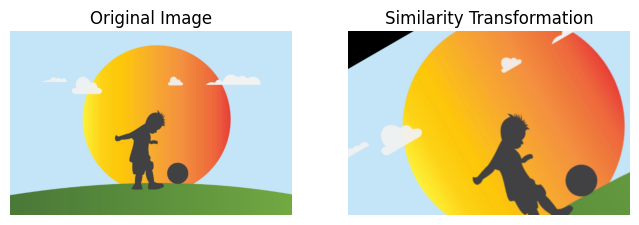

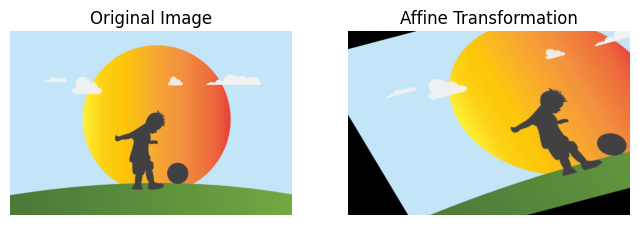

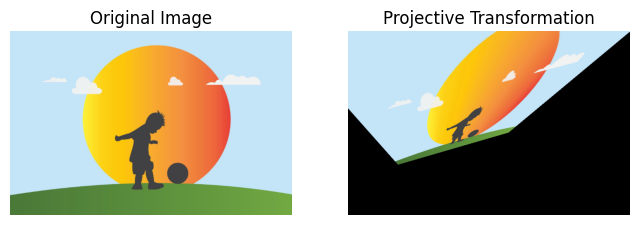

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#Load an image
img=cv2.imread('/content/image.png')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
rows,cols,ch =img.shape

def plot_images(original,transformed,title):
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    plt.imshow(original)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(transformed)
    plt.title(title)
    plt.axis('off')
    plt.show()

#1.Basic translation example
M_translation=np.float32([[1,0,100],[0,1,50]])  #to move 100 right, 50 down
translated_img=cv2.warpAffine(img,M_translation,(cols, rows))
plot_images(img,translated_img,'Translation')

#2.Basic scaling example
scaled_img=cv2.resize(img,None,fx=1.5,fy=1.5,interpolation=cv2.INTER_LINEAR)
plot_images(img,scaled_img,'Scaling')

#3.Basic rotation example
M_rotation=cv2.getRotationMatrix2D((cols/2,rows/2),45, 1)  #to rotate 45 degrees
rotated_img=cv2.warpAffine(img,M_rotation,(cols,rows))
plot_images(img,rotated_img,'Rotation')


#4.Euclidean Transformation (rotation + translation)
angle=30  #degrees
tx,ty =50, 30  #translation
M_euclidean=cv2.getRotationMatrix2D((cols/2,rows/2),angle,1)  # rotation
M_euclidean[:,2]+=[tx,ty]  # add translation
euclidean_img=cv2.warpAffine(img,M_euclidean,(cols,rows))
plot_images(img,euclidean_img,'Euclidean Transformation')

#5.Similarity Transformation (rotation + scaling + translation)
scale=1.5
M_similarity=cv2.getRotationMatrix2D((cols/2,rows/2),angle,scale)
M_similarity[:,2]+=[tx,ty]  # translation
similarity_img=cv2.warpAffine(img,M_similarity,(cols, rows))
plot_images(img,similarity_img,'Similarity Transformation')

#6.Affine Transformation (linear transformation preserving parallelism)
pts1=np.float32([[50,50],[200,50],[50,200]])
pts2=np.float32([[10,100],[200,50],[100,250]])
M_affine=cv2.getAffineTransform(pts1,pts2)
affine_img=cv2.warpAffine(img, M_affine,(cols,rows))
plot_images(img,affine_img,'Affine Transformation')

#7.Projective/Perspective Transformation
pts1=np.float32([[50,50],[200,50],[50,200],[200,200]])
pts2=np.float32([[10,100],[220,50],[100,250],[210,220]])
M_projective=cv2.getPerspectiveTransform(pts1,pts2)
projective_img=cv2.warpPerspective(img,M_projective,(cols,rows))
plot_images(img,projective_img,'Projective Transformation')

